<a href="https://colab.research.google.com/github/aghababaei-alireza/AI_Darsman/blob/main/Semester%206%20-%20Deep%20Learning/Learn/Part2-PyTorchLibrary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<span dir="rtl" style="font-family:B Nazanin" align="right">
    <h1>فصل ششم: یادگیری عمیق</h1>
    <h2>بخش دوم: کتابخانه PyTorch و کاربرد آن در یادگیری عمیق</h2>
</span>

<p style="font-family:B Nazanin" dir="rtl" align="right">
     در این فصل می‌خواهیم با کتابخانه قدرتمند PyTorch آشنا شویم که به ما این امکان را می‌دهد تا مدل‌های هوش مصنوعی خود را آموزش دهیم و از آن‌ها استفاده کنیم. یکی از ویژگی‌های بارز PyTorch این است که این امکان را برای ما فراهم می‌کند که کدهای خود را توسط GPU (پردازنده‌های گرافیکی) اجرا کنیم که بسیار بسیار قدرتمندتر از CPUها هستند. ویژگی بسیار محبوب دیگر این کتابخانه این است که اجازه می‌دهد تا مدل خود را در حین اجرا تغییر دهیم و مشکلات آن را بسیار راحت پیدا کرده و برطرف کنیم. <br>
    برای نصب این کتابخانه با استفاده از pip، در محیط ترمینال از دستور زیر استفاده می‌کنیم:
</p>

In [ ]:
!pip3 install torch torchvision torchaudio

<p style="font-family:B Nazanin" dir="rtl">
    برای استفاده از این کتابخانه باید ماژول <code>torch</code> را وارد کنیم.
</p>

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

<p style="font-family:B Nazanin" dir="rtl">
     یکی از مهم‌ترین قابلیت‌های کتابخانه PyTorch این است که می‌تواند کدها را روی GPU اجرا کند. برای بررسی این مورد که آیا GPU در دسترسی هست و می‌توانیم از آن استفاده کنیم دستور زیر را اجرا می‌کنیم:
</p>

In [ ]:
torch.cuda.is_available()

True

<p style="font-family:B Nazanin" dir="rtl">
    برای یافتن اطلاعات پردازنده گرافیکی که در حال حاضر فعال است از دستورات زیر در محیط ترمینال استفاده می‌کنیم:
</p>

In [ ]:
!nvidia-smi # برای پردازنده‌های گرافیکی برند NVIDIA

Fri Oct  4 14:02:52 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8              11W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

<p style="font-family:B Nazanin" dir="rtl">
    <b>انواع داده در PyTorch:</b> در کتابخانه PyTorch نوع داده‌های زیر وجود دارد که مقادیر بر اساس این نوع داده‌ها می‌توانند ذخیره شوند:<br>
    * torch.float32 یا torch.float: اعداد اعشاری که 32 بیت فضا مصرف می‌کنند.<br>
    * torch.float64 یا torch.double: اعداد اعشاری دقیق‌تر که 64 بیت فضا مصرف می‌کنند.<br>
    * torch.float16 یا torch.half: اعداد اعشاری که 16 بیت فضا مصرف می‌کنند.<br>
    * torch.int8: اعداد صحیح 8 بیتی (از -128 تا +127)<br>
    * torch.int16 یا torch.short: اعداد صحیح 16 بیتی<br>
    * torch.int32 یا torch.int: اعداد صحیح 32 بیتی<br>
    * torch.int64 یا torch.long: اعداد صحیح 6 بیتی<br>
    * torch.uint8: اعداد صحیح بدون علامت 8 بیتی (از صفر تا 255)<br>
    * torch.bool: متغیرهای منطقی (درست یا غلط)<br>
    * torch.bfloat16: اعداد اعشاری بهبودیافته نوع float با اندازه 32 بیت
</p>

<p style="font-family:B Nazanin" dir="rtl">
    <b>تنسور:</b><br>
    همان طور که می‌دانید مقادیر و داده‌ها می‌توانند در چند بعد ایجاد و ذخیره شوند. <br>
    داده‌های تکی یا بدون بعد را داده‌های اسکالر می‌گویند. مانند 25 یا 12.3. <br>
    داده‌هایی که در یک بعد ذخیره شوند را بردار می‌گویند. مانند:‌ [1,2,3] <br>
    داده‌هایی که در دو بعد ذخیره شوند را ماتریس می‌گویند. مانند: [[1,2,3],[4,5,6]]<br>
    داده‌هایی که در ابعاد بزرگتر از دو ایجاد شوند را تنسور (Tensor) می‌گویند.
</p>

<p style="font-family:B Nazanin" dir="rtl">
    تمامی داده‌ها از اسکالر تا داده‌های چندبعدی را می‌تواند در قالب تنسور در کتابخانه PyTorch ایجاد کرد. برای ایجاد داده اسکالر به صورت زیر عمل می‌کنیم:
</p>

In [ ]:
scaler_data1 = torch.tensor(12)
print(scaler_data1)

tensor(12)


<p style="font-family:B Nazanin" dir="rtl">
    نوع داده‌ای این متغیر را به صورت زیر می‌توانیم ببینیم:
</p>

In [ ]:
scaler_data1.dtype

torch.int64

<p style="font-family:B Nazanin" dir="rtl">
    ابعاد این متغیر را به صورت زیر می‌توانیم ببینیم:
</p>

In [ ]:
scaler_data1.shape

torch.Size([])

In [ ]:
scaler_data1.size()

torch.Size([])

<p style="font-family:B Nazanin" dir="rtl">
    برای اینکه ببینیم این متغیر روی چه دستگاهی (cpu یا gpu) ایجاد شده است، از دستور زیر استفاده می‌کنیم:
</p>

In [ ]:
scaler_data1.device

device(type='cpu')

<p style="font-family:B Nazanin" dir="rtl">
    با اینکه استفاده از GPU فعال شده است ولی به صورت پیش‌فرض متغیرها روی CPU ساخته می‌شوند. برای ایجاد متغیر روی GPU در هنگام ساخت متغیر باید این مسئله را مشخص کنیم.
</p>

In [ ]:
scaler_data2 = torch.tensor(56.7)
print(scaler_data2)
print(scaler_data2.dtype)
print(scaler_data2.shape)
print(scaler_data2.device)

tensor(56.7000)
torch.float32
torch.Size([])
cpu


In [ ]:
scaler_data3 = torch.tensor(True)
print(scaler_data3)
print(scaler_data3.dtype)
print(scaler_data3.shape)
print(scaler_data3.device)

tensor(True)
torch.bool
torch.Size([])
cpu


In [ ]:
scaler_data4 = torch.tensor(12, dtype=torch.float64)
print(scaler_data4)
print(scaler_data4.dtype)
print(scaler_data4.shape)
print(scaler_data4.device)

tensor(12., dtype=torch.float64)
torch.float64
torch.Size([])
cpu


<p style="font-family:B Nazanin" dir="rtl">
    برای ایجاد یک متغیر روی GPU باید مقدار پارامتر device را هنگام تعریف متغیر برابر با cuda بگذاریم.
</p>

In [ ]:
scaler_data5 = torch.tensor(12, dtype=torch.float64, device='cuda')
print(scaler_data5)
print(scaler_data5.dtype)
print(scaler_data5.shape)
print(scaler_data5.device)

tensor(12., device='cuda:0', dtype=torch.float64)
torch.float64
torch.Size([])
cuda:0


<p style="font-family:B Nazanin" dir="rtl">
    برای ایجاد بردار در قالب تنسور به صورت زیر عمل می‌کنیم:
</p>

In [ ]:
vector_data1 = torch.tensor([213,54,5,5,4,343,234])
print(vector_data1)
print(vector_data1.dtype)
print(vector_data1.shape)

tensor([213,  54,   5,   5,   4, 343, 234])
torch.int64
torch.Size([7])


<p style="font-family:B Nazanin" dir="rtl">
    اگر حتی یکی از اعداد بردارد به صورت اعشاری باشد، کل بردار به صورت اعشاری ذخیره می‌شود:
</p>

In [ ]:
vector_data2 = torch.tensor([3,5,6.45,30,41])
print(vector_data2)
print(vector_data2.dtype)
print(vector_data2.shape)

tensor([ 3.0000,  5.0000,  6.4500, 30.0000, 41.0000])
torch.float32
torch.Size([5])


<p style="font-family:B Nazanin" dir="rtl">
    برای ذخیره کردن ماتریس‌ها به صورت زیر عمل می‌کنیم:
</p>

In [ ]:
mat_data1 = torch.tensor([
    [1,2,3],
    [4,5,6],
    [7,8,9],
    [10,11,12]
])
print(mat_data1)
print(mat_data1.dtype)
print(mat_data1.shape)
print(mat_data1.size())
print(mat_data1.device)

tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])
torch.int64
torch.Size([4, 3])
torch.Size([4, 3])
cpu


In [ ]:
print(mat_data1.shape[0])

4


<p style="font-family:B Nazanin" dir="rtl">
    برای تعریف تنسور (داده‌های چندبعدی) به صورت زیر عمل می‌کنیم:
</p>

In [ ]:
td_data1 = torch.tensor([
    [[1,2,3],
    [4,5,6],
    [7,8,9],
    [10,11,12]],
    [[1,2,3],
    [4,5,6],
    [7,8,9],
    [10,11,12]]
])
print(td_data1)
print(td_data1.dtype)
print(td_data1.shape)
print(td_data1.device)

tensor([[[ 1,  2,  3],
         [ 4,  5,  6],
         [ 7,  8,  9],
         [10, 11, 12]],

        [[ 1,  2,  3],
         [ 4,  5,  6],
         [ 7,  8,  9],
         [10, 11, 12]]])
torch.int64
torch.Size([2, 4, 3])
cpu


<p style="font-family:B Nazanin" dir="rtl">
    متغیری که روی CPU تعریف شده است را با استفاده از تابع <code>cuda()</code> می‌توان به یک متغیر که روی GPU‌ تعریف شده است، تبدیل کرد.
</p>

In [ ]:
td_data1 = td_data1.cuda()
print(td_data1.device)

cuda:0


<p style="font-family:B Nazanin" dir="rtl">
    برای تغییر نوع داده یک متغیر به دو روش می‌توان عمل کرد. روش اول استفاده از یک تابع است همنام با نوع داده‌ای که می‌خواهیم به متغیر را به آن تغییر دهیم. مثلا اگر می‌خواهیم یک متغیر صحیح را به اعشاری تبدیل کنیم، از تابع <code>float()</code> استفاده می‌کنیم.
</p>

In [ ]:
data1 = torch.tensor([12,345,67,72])
print(data1.dtype)

torch.int64


In [ ]:
data1 = data1.float()
print(data1.dtype)

torch.float32


<p style="font-family:B Nazanin" dir="rtl">
    روش دوم استفاده از تابع <code>type()</code> است که نوع داده مورد نظر را به عنوان ورودی به آن می‌دهیم:
</p>

In [ ]:
data1 = data1.type(torch.float16)
print(data1.dtype)

torch.float16


<p style="font-family:B Nazanin" dir="rtl">
    توابع پرکاربردی که در هنگام کار با تنسورها استفاده می‌شود به صورت زیر است:
</p>

In [ ]:
data2 = torch.tensor([
    [12,345,67,-72,67,24,46,78,21,-12,67,45],
    [55,345,32,16,32,-6,17,78,49,-87,25,11]
])

In [ ]:
print(f'Data: {data2}')

Data: tensor([[ 12, 345,  67, -72,  67,  24,  46,  78,  21, -12,  67,  45],
        [ 55, 345,  32,  16,  32,  -6,  17,  78,  49, -87,  25,  11]])


In [ ]:
print(f'Data Float: {data2.float()}')

Data Float: tensor([[ 12., 345.,  67., -72.,  67.,  24.,  46.,  78.,  21., -12.,  67.,  45.],
        [ 55., 345.,  32.,  16.,  32.,  -6.,  17.,  78.,  49., -87.,  25.,  11.]])


In [ ]:
print(f'Min: {data2.min()}')

Min: -87


In [ ]:
print(f'Max: {data2.max()}')

Max: 345


In [ ]:
print(f'Sum: {data2.sum()}')

Sum: 1255


In [ ]:
print(f'Mode: {data2.float().mode()}')

Mode: torch.return_types.mode(
values=tensor([67., 32.]),
indices=tensor([10,  4]))


In [ ]:
print(f'Median: {data2.float().median()}')

Median: 32.0


In [ ]:
print(f'Mean: {data2.float().mean()}')

Mean: 52.29166793823242


In [ ]:
print(f'Var: {data2.float().var()}')

Var: 9785.171875


In [ ]:
print(f'Std: {data2.float().std()}')

Std: 98.92002868652344


In [ ]:
print(f'Abs: {data2.abs()}')

Abs: tensor([[ 12, 345,  67,  72,  67,  24,  46,  78,  21,  12,  67,  45],
        [ 55, 345,  32,  16,  32,   6,  17,  78,  49,  87,  25,  11]])


In [ ]:
print(f'Transpose: {data2.t()}')

Transpose: tensor([[ 12,  55],
        [345, 345],
        [ 67,  32],
        [-72,  16],
        [ 67,  32],
        [ 24,  -6],
        [ 46,  17],
        [ 78,  78],
        [ 21,  49],
        [-12, -87],
        [ 67,  25],
        [ 45,  11]])


<p style="font-family:B Nazanin" dir="rtl">
    برای گرد کردن اعداد از توابع زیر می‌توانیم استفاده کنیم:‌<br>
    * تابع <code>ceil()</code>: اعداد را به اولین عدد صحیح بزرگتر از خودش گرد می‌کند.<br>
    * تابع <code>floor()</code>: اعداد را به اولین عدد کوچکتر از خودش گرد می‌کند. <br>
    * تابع <code>fix()</code>: قسمت اعشار عدد را حذف می‌کند و قسمت صحیح را نگه می‌دارد.<br>
    * تابع <code>round()</code>: اعداد را به نزدیک‌ترین عدد صحیح گرد می‌کند.
</p>

In [ ]:
data3 = torch.tensor([2.3456, 15.890324, 9., -3.48, 3.48, 17.6210, 100, 99.999])
print(f'Data\t:\t{data3}')
print(f'Ceil\t:\t{data3.ceil()}')
print(f'Floor\t:\t{data3.floor()}')
print(f'Fix\t:\t{data3.fix()}')
print(f'Round\t:\t{data3.round()}')

Data	:	tensor([  2.3456,  15.8903,   9.0000,  -3.4800,   3.4800,  17.6210, 100.0000,
         99.9990])
Ceil	:	tensor([  3.,  16.,   9.,  -3.,   4.,  18., 100., 100.])
Floor	:	tensor([  2.,  15.,   9.,  -4.,   3.,  17., 100.,  99.])
Fix	:	tensor([  2.,  15.,   9.,  -3.,   3.,  17., 100.,  99.])
Round	:	tensor([  2.,  16.,   9.,  -3.,   3.,  18., 100., 100.])


<p style="font-family:B Nazanin" dir="rtl">
    توابع <code>argmax()</code> و <code>argmin()</code> اندیس بزرگترین و کوچکترین داده‌های یک تنسور را مشخص می‌کند.
</p>

In [ ]:
data4 = torch.tensor([2, 45, 15, 9., -3, 3, 17, 99, 38, 26])
print(f'Data\t:\t{data4}')
print(f'Argmax\t:\t{torch.argmax(data4)}')
print(f'Argmin\t:\t{torch.argmin(data4)}')

Data	:	tensor([ 2., 45., 15.,  9., -3.,  3., 17., 99., 38., 26.])
Argmax	:	7
Argmin	:	4


<p style="font-family:B Nazanin" dir="rtl">
    تابع <coed>topk()</code> با گرفتن پارامتر k، تعداد kتا از بزرگترین داده‌های تنسور را برمی‌گرداند.
</p>

In [ ]:
print(f'topk:\n{torch.topk(data4, 3)}')

topk:
torch.return_types.topk(
values=tensor([99., 45., 38.]),
indices=tensor([7, 1, 8]))


<p style="font-family:B Nazanin" dir="rtl">
    تابع <code>norm()</code>، نرم یک تنسور را محاسبه می‌کند. در مثال زیر، نرم اقلیدسی محاسبه شده است:
</p>

In [ ]:
print(f'Euclidean Norm (L2 Norm): {torch.norm(data4, p=2)}')

Euclidean Norm (L2 Norm): 120.67725372314453


<p style="font-family:B Nazanin" dir="rtl">
    تابع <code>remainder()</code> باقیمانده تقسیم داده‌های یک تنسور بر یک عدد مشخص را محاسبه می‌کند:
</p>

In [ ]:
print(f'Remainder of division by 7: {torch.remainder(data4, 7)}')

Remainder of division by 7: tensor([2., 3., 1., 2., 4., 3., 3., 1., 3., 5.])


<p style="font-family:B Nazanin" dir="rtl">
    برای تابعی مانند <code>sum()</code> می‌توان پارامتر دومی را مشخص کرد که به جای محاسبه مجموع همه اعداد تنسور، مجموع اعداد هر یک از ابعاد را مشخص کند.
</p>

In [ ]:
data3 = torch.tensor([1,2,3,4,5,8])
data4 = torch.tensor([[1,2,3,4,5,8], [10, 20, 30, 40, 50, 80]])

print(torch.sum(data3, 0))
print(torch.sum(data4, 1))

tensor(23)
tensor([ 23, 230])


<p style="font-family:B Nazanin" dir="rtl">
    تابع <code>cumsum()</code> مجموع تجمعی داده‌های تنسور، تابع <code>prod</code> حاصل‌ضرب داده‌های تنسور، تابع <code>cumprod()</code> حاصل‌ضرب تجمعی داده‌های تنسور و تابع <code>diff</code> اختلاف داده‌های مجاور در تنسور را محاسبه می‌کند.
</p>

In [ ]:
print(torch.cumsum(data3, 0))
print(torch.prod(data3, 0))
print(torch.cumprod(data3, 0))
print(torch.diff(data3, 0))

tensor([ 1,  3,  6, 10, 15, 23])
tensor(960)
tensor([  1,   2,   6,  24, 120, 960])
tensor([1, 2, 3, 4, 5, 8])


<p style="font-family:B Nazanin" dir="rtl">
    تابع <code>exp2()</code>، 2 به توان داده‌های تنسور را محاسبه می‌کند و تابع <code>log2()</code>، لگاریتم داده‌های تنسور را مشخص می‌کند.
</p>

In [ ]:
data1 = torch.tensor([1,2,3,4,5,6])
data2 = data1.exp2()
data3 = data2.log2()

print(f'data1:\t{data1}')
print(f'data2:\t{data2}')
print(f'data3:\t{data3}')

data1:	tensor([1, 2, 3, 4, 5, 6])
data2:	tensor([ 2.,  4.,  8., 16., 32., 64.])
data3:	tensor([1., 2., 3., 4., 5., 6.])


<p style="font-family:B Nazanin" dir="rtl">
    توابع <code>square()</code> و <code>sqrt()</code> به ترتیب مجذور و جذر داده‌ّای تنسور را محاسبه می‌کند.
</p>

In [ ]:
data1 = torch.tensor([1,2,3,4,5,6])
data2 = data1.square()
data3 = data2.sqrt()

print(f'data1:\t{data1}')
print(f'data2:\t{data2}')
print(f'data3:\t{data3}')

data1:	tensor([1, 2, 3, 4, 5, 6])
data2:	tensor([ 1,  4,  9, 16, 25, 36])
data3:	tensor([1., 2., 3., 4., 5., 6.])


<p style="font-family:B Nazanin" dir="rtl">
    برخی از توابع در این کتابخانه در انتهای نامشان یک کاراکتر _ دارند. این توابع دقیقا مشابه با تابع هم‌نامشان (بدون _) عمل می‌کنند با این تفاوت که در انتها مقدار محاسبه شده را درون خود تنسور می‌ریزند. مثلا تابع <code>ceil</code> اعداد تنسور را رو به بالا گرد می‌کند و یک تنسور جدید خروجی می‌دهد و به تنسور اولیه دست نمی‌زند. اما تابع <code>ceil_()</code> مقادیر جدید را درون همان تنسور اولیه اصلاح می‌کند.
</p>

In [ ]:
data3 = torch.tensor([2.3456, 15.890324, 9., 17.6210, 20.43, 99.999])
print(f'Data\t:\t{data3}')
print(f'Ceil\t:\t{data3.ceil_()}')
print(f'Data\t:\t{data3}')

Data	:	tensor([ 2.3456, 15.8903,  9.0000, 17.6210, 20.4300, 99.9990])
Ceil	:	tensor([  3.,  16.,   9.,  18.,  21., 100.])
Data	:	tensor([  3.,  16.,   9.,  18.,  21., 100.])


<p style="font-family:B Nazanin" dir="rtl">
    تابع <code>dist()</code> فاصله بین دو بردار را محاسبه می‌کند.
</p>

In [ ]:
data1 = torch.tensor([2., 15, 9, 17, 20, 99])
data2 = torch.tensor([4, 12., 3, 26, 48, 31])
torch.dist(data1, data2, p=2) # p=2: Euclidean distance

tensor(74.4177)

<p style="font-family:B Nazanin" dir="rtl">
    تابع <code>range()</code> دقیقا مانند تابع range در پایتون عمل می‌کند و بازه‌ای از اعداد را می‌سازد و به تنسور تبدیل می‌کند.
</p>

In [ ]:
vdata = torch.range(1, 20, 2)
print(vdata)

tensor([ 1.,  3.,  5.,  7.,  9., 11., 13., 15., 17., 19.])


<ipython-input-72-72a232c17115>:1: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  vdata = torch.range(1, 20, 2)


<p style="font-family:B Nazanin" dir="rtl">
    توابع <code>ones()</code> و <code>zeros()</code> و <code>empty()</code> و <code>eye()</code> به ترتیب برای ساختن ماتریس با اعضای یک، ماتریس با اعضای صفر، ماتریس با اعضایی که مقداردهی اولیه نشده و ماتریس همانی استفاده می‌شود.
</p>

In [ ]:
shape = (3,5)
data_ones = torch.ones(shape)
data_zeros = torch.zeros(shape)
data_empty = torch.empty(shape)
data_eye = torch.eye(5)

print(f'Ones:\n{data_ones}')
print(f'Zeros:\n{data_zeros}')
print(f'Empty:\n{data_empty}')
print(f'Eye:\n{data_eye}')

Ones:
tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])
Zeros:
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
Empty:
tensor([[2.8183e+20, 6.1972e-04, 1.4585e-19, 7.2708e+31, 7.1430e+31],
        [1.5766e-19, 7.0295e+28, 1.6312e+19, 7.0976e+22, 1.8609e+34],
        [1.8315e+25, 7.5551e+31, 6.1960e-04, 3.1457e-12, 2.7340e+20]])
Eye:
tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])


<p style="font-family:B Nazanin" dir="rtl">
    تابع <code>rand()</code> یک تنسور با اعداد تصادفی می‌سازد که اعداد بین صفر تا یک هستند. تابع <code>randn()</code> یک تنسور با اعداد تصادفی که توزیع نرمال دارند می‌سازد. تابع <code>randint()</code> نیز یک تنسور با اعداد صحیح تصادفی در یک بازه مشخص می‌سازد.
</p>

In [ ]:
data_rand1 = torch.rand((2,5))
print(data_rand1)

tensor([[0.4081, 0.5655, 0.4506, 0.0584, 0.7707],
        [0.1064, 0.6604, 0.2750, 0.4928, 0.4923]])


(array([13., 12.,  8., 15.,  8., 14.,  6.,  7., 14.,  7., 11.,  8.,  5.,
        11., 12.,  8.,  9.,  7., 15.,  5., 18.,  8.,  8.,  9., 18., 13.,
         8., 15., 13., 13., 15., 11.,  6., 10.,  6.,  5., 11.,  6., 15.,
         9.,  9., 11., 12., 13.,  7.,  8., 17.,  5., 10., 14.,  9.,  2.,
        11., 11.,  6., 10., 10.,  6.,  8., 13.,  6.,  6.,  8.,  7., 13.,
        10., 14.,  9., 12.,  9., 10., 10., 11., 15.,  8.,  9., 12., 15.,
        11.,  4., 12.,  6.,  7.,  8., 14., 18.,  9., 10.,  4., 12.,  9.,
        12.,  7.,  6.,  8.,  9., 13., 12., 11., 10.]),
 array([1.01447105e-04, 1.00952126e-02, 2.00889781e-02, 3.00827436e-02,
        4.00765091e-02, 5.00702746e-02, 6.00640401e-02, 7.00578019e-02,
        8.00515711e-02, 9.00453329e-02, 1.00039102e-01, 1.10032864e-01,
        1.20026633e-01, 1.30020395e-01, 1.40014157e-01, 1.50007933e-01,
        1.60001695e-01, 1.69995457e-01, 1.79989219e-01, 1.89982995e-01,
        1.99976757e-01, 2.09970519e-01, 2.19964281e-01, 2.29958057e-01,
  

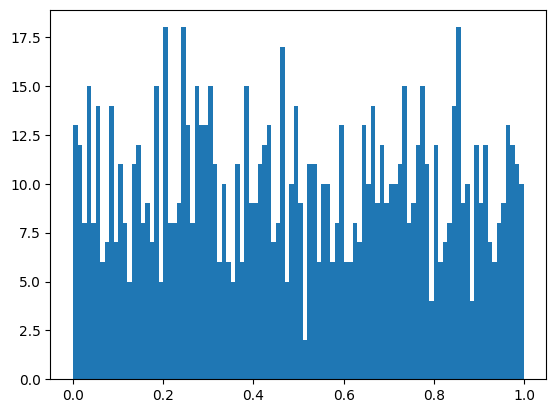

In [ ]:
data_rand2 = torch.rand(1000)
plt.hist(data_rand2, 100)

In [ ]:
data_rand3 = torch.randn(100)
print(data_rand3)

tensor([-0.8983, -0.0312, -2.0338,  0.4070,  0.5947,  1.0142, -0.7297, -1.1987,
         0.3591,  1.1901,  0.1697, -0.7105, -1.8266, -2.2333,  0.3247,  0.6451,
         0.3730, -0.7942, -0.1730, -0.7379, -0.1594, -0.1379, -1.1123, -0.8680,
        -1.3311, -1.1035, -0.1235,  0.9662, -0.9300, -1.3529,  1.8491,  0.2847,
         0.6409, -0.0376, -1.2922, -0.8869,  0.8834, -0.2160,  0.7924,  0.5654,
        -0.4592,  0.6580, -0.9975, -0.2891,  0.5465,  1.3077,  0.4468,  0.5659,
        -0.8442, -0.5672,  0.1233, -0.6788,  1.9339, -0.8766,  0.6033, -0.9545,
        -0.6315, -0.3161,  0.4726,  1.1513,  1.3032, -1.1656, -0.1219, -1.1784,
        -0.2130,  2.2757,  0.6841, -0.5505,  1.7227,  2.0511, -0.6771,  1.1494,
         0.2680, -1.5438,  0.0584, -0.7475,  0.0612,  0.1710, -1.3533, -1.1439,
        -0.1099,  0.7114,  1.2616,  0.3221,  1.2310, -0.0203,  0.8379, -0.3470,
        -1.1461, -0.9047, -0.3420, -1.5056,  1.4937, -0.5969, -1.2593,  0.2194,
         1.8472,  0.5976, -1.4234,  0.80

(array([ 1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         1.,  4.,  2.,  1.,  1.,  0.,  1.,  4.,  2.,  2.,  6.,  8.,  6.,
         2.,  6.,  7.,  3.,  8.,  8., 10.,  8., 15., 10., 16., 16., 12.,
        13., 21., 12., 24., 30., 21., 23., 26., 30., 28., 31., 19., 23.,
        29., 23., 25., 28., 24., 21., 30., 24., 23., 16., 19., 28., 24.,
        16., 20., 19.,  7.,  8., 19., 11., 11., 11., 10., 13., 11.,  9.,
         8., 11.,  4.,  3.,  3.,  2.,  4.,  0.,  1.,  5.,  2.,  2.,  2.,
         3.,  0.,  2.,  3.,  0.,  1.,  1.,  0.,  1.]),
 array([-3.33315539, -3.27063894, -3.20812225, -3.1456058 , -3.08308911,
        -3.02057266, -2.95805621, -2.89553952, -2.83302307, -2.77050638,
        -2.70798993, -2.64547348, -2.58295679, -2.52044034, -2.45792365,
        -2.3954072 , -2.33289075, -2.27037406, -2.20785761, -2.14534092,
        -2.08282447, -2.02030802, -1.95779133, -1.89527488, -1.83275831,
        -1.77024174, -1.70772517, -1.6452086 , -1.58269215, -1.520175

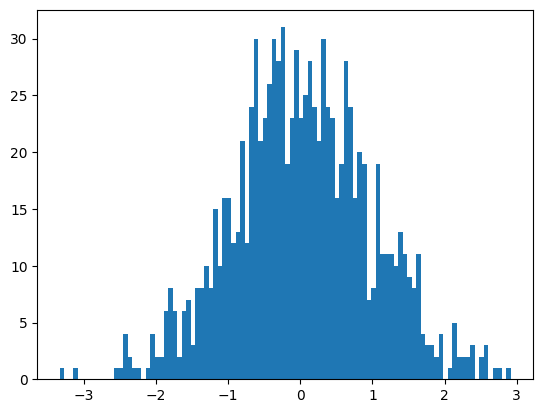

In [ ]:
data_rand4 = torch.randn(1000)
plt.hist(data_rand4, 100)

In [ ]:
shape = (3,5)
data_rand_int1 = torch.randint(1, 10, shape)
print(data_rand_int1)

tensor([[3, 5, 1, 4, 1],
        [7, 2, 3, 9, 6],
        [8, 1, 6, 5, 2]])


In [ ]:
data_rand_int2 = torch.randint(1, 10, (1,))
print(data_rand_int2)

tensor([9])


<p style="font-family:B Nazanin" dir="rtl">
    تابع <code>item()</code> برای تنسورهایی که فقط یک عنصر دارند، مقدار آن عنصر را برمی‌گرداند.
</p>

In [ ]:
data_rand_int3 = torch.randint(3, 21, (1,)).item()
print(data_rand_int3)
print(type(data_rand_int3))

15
<class 'int'>


<p style="font-family:B Nazanin" dir="rtl">
    تابع <code>randperm()</code> تنسوری از اعداد تصادفی غیرتکراری ایجاد می‌کند.
</p>

In [ ]:
data_rand_perm = torch.randperm(10)
print(data_rand_perm)

tensor([9, 3, 4, 7, 5, 6, 0, 8, 2, 1])


<p style="font-family:B Nazanin" dir="rtl">
    تابع <code>repeat()</code> یک تنسور می‌گیرد و به تعداد مشخص‌شده آن را تکرار می‌کند.
</p>

In [ ]:
vdata = torch.tensor([1,3,5,6])
print(vdata)

mat_data = vdata.repeat(3)
print(mat_data)

mat_data = vdata.repeat((3,2))
print(mat_data)

tensor([1, 3, 5, 6])
tensor([1, 3, 5, 6, 1, 3, 5, 6, 1, 3, 5, 6])
tensor([[1, 3, 5, 6, 1, 3, 5, 6],
        [1, 3, 5, 6, 1, 3, 5, 6],
        [1, 3, 5, 6, 1, 3, 5, 6]])


<p style="font-family:B Nazanin" dir="rtl">
    تابع <cod>zero_()</code> که روی یک تنسور اعمال می‌شود، تمام داده‌های آن تنسور را به صفر تبدیل می‌کند.
</p>

In [3]:
data = torch.randint(1,21,(5,5))
data

tensor([[12,  4, 20, 18, 15],
        [ 6,  3, 11,  6,  8],
        [20, 17,  7, 12,  1],
        [ 2,  5, 10, 13, 12],
        [13, 17, 13, 16,  1]])

In [4]:
data.zero_()
data

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]])

<p style="font-family:B Nazanin" dir="rtl">
    تابع <code>fill_(n)</code> یک پارامتر ورودی می‌گیرد و همه داده‌های یک تنسور را با آن عدد جایگزین می‌کند.
</p>

In [5]:
data.fill_(1)
data

tensor([[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]])

<p style="font-family:B Nazanin" dir="rtl">
    تابع <code>eye</code> نیز ماتریس همانی یا یکه می‌سازد.
</p>

In [6]:
torch.eye(data.shape[1])

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])

<p style="font-family:B Nazanin" dir="rtl">
    تابع <code>zeros_like()</code> یک تنسور به عنوان ورودی می‌گیرد و یک تنسور که همه داده‌های آن صفر است و ابعاد آن به اندازه ابعاد تنسور ورودی است، می‌سازد.
</p>

In [7]:
z = torch.zeros_like(data)
z

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]])

<p style="font-family:B Nazanin" dir="rtl">
    عملیات جمع، تفریق، ضرب و تقسیم را می‌توان روی تنسورها انجام داد که درایه به درایه روی داده‌های تنسورها انجام می‌شود.
</p>

In [8]:
v1 = torch.randint(1, 21, (8,))
v2 = torch.randint(1, 21, (8,))
v3 = torch.randint(1, 21, (10,))

print(f'Vector1: {v1}')
print(f'Vector2: {v2}')
print(f'Vector3: {v3}')

Vector1: tensor([20, 13,  8,  6,  2, 19, 12,  9])
Vector2: tensor([ 9, 15, 15,  3,  3,  7,  1, 11])
Vector3: tensor([ 1,  1, 14,  1, 16, 10, 20, 10, 15,  5])


In [9]:
print(f'v1 + v2 => {v1+v2}')
# print(f'v1 + v3 => {v1+v3}') # Error
print(f'v1 - v2 => {v1-v2}')
print(f'v1 * v2 => {v1*v2}')
print(f'v1 / v2 => {v1/v2}')

v1 + v2 => tensor([29, 28, 23,  9,  5, 26, 13, 20])
v1 - v2 => tensor([11, -2, -7,  3, -1, 12, 11, -2])
v1 * v2 => tensor([180, 195, 120,  18,   6, 133,  12,  99])
v1 / v2 => tensor([ 2.2222,  0.8667,  0.5333,  2.0000,  0.6667,  2.7143, 12.0000,  0.8182])


In [12]:
mat1 = torch.randint(1, 21, (3,4))
mat2 = torch.randint(1, 21, (3,4))
mat3 = torch.randint(1, 21, (4,7))

print(f'Matrix1:\n{mat1}')
print(f'Matrix2:\n{mat2}')
print(f'Matrix3:\n{mat3}')

Matrix1:
tensor([[14, 14,  3, 13],
        [14, 18,  9, 16],
        [14,  6,  4, 18]])
Matrix2:
tensor([[18, 19,  1, 13],
        [16, 12,  9, 16],
        [15,  4,  1, 11]])
Matrix3:
tensor([[14, 19, 18, 10, 14,  3,  3],
        [ 9,  6, 13,  1,  1, 13, 15],
        [17, 13, 15, 16, 11, 18,  6],
        [ 8, 20,  9, 11,  6, 18,  8]])


In [13]:
print(f'mat1 + mat2 => \n{mat1+mat2}')
print(f'mat1 - mat2 => \n{mat1-mat2}')
print(f'mat1 * mat2 => \n{mat1*mat2}')
print(f'mat1 / mat2 => \n{mat1/mat2}')

mat1 + mat2 => 
tensor([[32, 33,  4, 26],
        [30, 30, 18, 32],
        [29, 10,  5, 29]])
mat1 - mat2 => 
tensor([[-4, -5,  2,  0],
        [-2,  6,  0,  0],
        [-1,  2,  3,  7]])
mat1 * mat2 => 
tensor([[252, 266,   3, 169],
        [224, 216,  81, 256],
        [210,  24,   4, 198]])
mat1 / mat2 => 
tensor([[0.7778, 0.7368, 3.0000, 1.0000],
        [0.8750, 1.5000, 1.0000, 1.0000],
        [0.9333, 1.5000, 4.0000, 1.6364]])


<p style="font-family:B Nazanin" dir="rtl">
    دقت کنید که عملیات ضربی که در بالا به آن اشاره شد، ضرب ماتریسی نیست، بلکه ضرب درایه به درایه است. برای انجام ضرب ماتریسی از عملگر @ استفاده می‌کنیم. همچنین برای این کار از تابع <code>matmul</code> نیز می‌توان استفاده کرد.
</p>

In [16]:
print(f'mat1 * mat3 =>\n{mat1 @ mat3}')

mat1 * mat3 =>
tensor([[477, 649, 596, 345, 321, 512, 374],
        [639, 811, 765, 478, 409, 726, 494],
        [462, 714, 552, 408, 354, 516, 300]])


In [17]:
print(f'mat1 * mat3 =>\n{torch.matmul(mat1, mat3)}')

mat1 * mat3 =>
tensor([[477, 649, 596, 345, 321, 512, 374],
        [639, 811, 765, 478, 409, 726, 494],
        [462, 714, 552, 408, 354, 516, 300]])


<p style="font-family:B Nazanin" dir="rtl">
    برای دسترسی به داده‌های درون یک تنسور از اندیس‌ها استفاده می‌کنیم. می‌دانیم که اندیس‌ها از صفر شروع می‌شوند. همچنین اندیس‌های منفی نیز وجود دارند که از انتهای تنسور شمرده می‌شوند.
</p>

In [21]:
torch.manual_seed(42)
vector_data = torch.randint(1, 21, (8,))
vector_data

tensor([ 3,  8, 17, 15,  7, 16,  1,  5])

In [22]:
print(vector_data[0])
print(vector_data[2])
print(vector_data[-1])

tensor(3)
tensor(17)
tensor(5)


In [24]:
mat_data = torch.randint(1, 21, (3, 6))
mat_data

tensor([[ 2, 10,  8, 20, 13,  1],
        [16, 10, 14,  5, 20, 17],
        [13, 11,  7,  3, 18, 20]])

In [26]:
print(mat_data[0, 1])
print(mat_data[-1, 1])
print(mat_data[-1, -1])
print(mat_data[2])

tensor(10)
tensor(11)
tensor(20)
tensor([13, 11,  7,  3, 18, 20])


<p style="font-family:B Nazanin" dir="rtl">
    مشابه با لیست‌ها در پایتون، عملیات Slicing را روی تنسورها نیز می‌توان انجام داد.
</p>

In [27]:
vector_data = torch.randint(1, 21, (10,))
vector_data

tensor([ 8,  4,  4, 15, 14, 18, 11, 10, 11, 20])

In [28]:
print(vector_data[2:6])
print(vector_data[:6])
print(vector_data[2:])
print(vector_data[:])
print(vector_data[:-1])
print(vector_data[::2])

tensor([ 4, 15, 14, 18])
tensor([ 8,  4,  4, 15, 14, 18])
tensor([ 4, 15, 14, 18, 11, 10, 11, 20])
tensor([ 8,  4,  4, 15, 14, 18, 11, 10, 11, 20])
tensor([ 8,  4,  4, 15, 14, 18, 11, 10, 11])
tensor([ 8,  4, 14, 11, 11])


In [29]:
mat_data = torch.randint(1, 21, (7, 8))
mat_data

tensor([[ 7, 20, 16,  5, 19,  9,  7, 11],
        [ 1,  1, 11,  2,  4,  1, 12,  2],
        [18, 10,  5, 14,  9, 10,  4,  8],
        [19, 12, 15, 12, 17,  4,  3, 11],
        [10,  9, 16, 14,  8,  8,  6, 10],
        [ 2,  6,  2, 20,  2,  5, 11, 14],
        [18, 16, 18,  2,  6,  8,  6, 19]])

In [30]:
print(mat_data[2:5, 1:3])
print(mat_data[:, 1:3])
print(mat_data[2:5, :])
print(mat_data[:5, 4:])
print(mat_data[:, :])

tensor([[10,  5],
        [12, 15],
        [ 9, 16]])
tensor([[20, 16],
        [ 1, 11],
        [10,  5],
        [12, 15],
        [ 9, 16],
        [ 6,  2],
        [16, 18]])
tensor([[18, 10,  5, 14,  9, 10,  4,  8],
        [19, 12, 15, 12, 17,  4,  3, 11],
        [10,  9, 16, 14,  8,  8,  6, 10]])
tensor([[19,  9,  7, 11],
        [ 4,  1, 12,  2],
        [ 9, 10,  4,  8],
        [17,  4,  3, 11],
        [ 8,  8,  6, 10]])
tensor([[ 7, 20, 16,  5, 19,  9,  7, 11],
        [ 1,  1, 11,  2,  4,  1, 12,  2],
        [18, 10,  5, 14,  9, 10,  4,  8],
        [19, 12, 15, 12, 17,  4,  3, 11],
        [10,  9, 16, 14,  8,  8,  6, 10],
        [ 2,  6,  2, 20,  2,  5, 11, 14],
        [18, 16, 18,  2,  6,  8,  6, 19]])


In [31]:
ten_data = torch.randint(1, 21, (3, 5, 8))
ten_data

tensor([[[16, 15, 12,  2, 11, 20,  1, 10],
         [12,  9, 20, 17, 18,  7,  1, 20],
         [ 6, 13, 20, 12,  8,  9, 17,  1],
         [ 7,  9, 17,  9, 11, 17, 20,  1],
         [16, 20, 16,  3, 11, 19,  9,  8]],

        [[ 3,  3, 17, 19, 13, 18,  7, 14],
         [ 1,  4,  7,  1,  4,  8, 14,  9],
         [20, 19,  3,  6, 16,  5, 19, 12],
         [ 8, 10,  3,  7,  9,  3,  9,  3],
         [ 2, 11,  1, 17,  6, 11,  7, 10]],

        [[ 3, 15, 13, 11,  3, 14, 14, 12],
         [17, 15,  7, 20, 15,  9, 20, 13],
         [16, 20, 10, 17, 15, 11,  9,  3],
         [15,  1, 12,  1,  8, 11, 19, 19],
         [10, 12, 14,  2,  5,  2,  1,  9]]])

In [34]:
print(ten_data[1:2, :4, 2:])
print(ten_data[2])
print(ten_data[...]) # Ellipsis (...) sign: به معنای همه عناصر است
print(ten_data[..., 2]) # یعنی همه ابعاد فقط در بعد آخر دومین اندیس آورده شود.

tensor([[[17, 19, 13, 18,  7, 14],
         [ 7,  1,  4,  8, 14,  9],
         [ 3,  6, 16,  5, 19, 12],
         [ 3,  7,  9,  3,  9,  3]]])
tensor([[ 3, 15, 13, 11,  3, 14, 14, 12],
        [17, 15,  7, 20, 15,  9, 20, 13],
        [16, 20, 10, 17, 15, 11,  9,  3],
        [15,  1, 12,  1,  8, 11, 19, 19],
        [10, 12, 14,  2,  5,  2,  1,  9]])
tensor([[[16, 15, 12,  2, 11, 20,  1, 10],
         [12,  9, 20, 17, 18,  7,  1, 20],
         [ 6, 13, 20, 12,  8,  9, 17,  1],
         [ 7,  9, 17,  9, 11, 17, 20,  1],
         [16, 20, 16,  3, 11, 19,  9,  8]],

        [[ 3,  3, 17, 19, 13, 18,  7, 14],
         [ 1,  4,  7,  1,  4,  8, 14,  9],
         [20, 19,  3,  6, 16,  5, 19, 12],
         [ 8, 10,  3,  7,  9,  3,  9,  3],
         [ 2, 11,  1, 17,  6, 11,  7, 10]],

        [[ 3, 15, 13, 11,  3, 14, 14, 12],
         [17, 15,  7, 20, 15,  9, 20, 13],
         [16, 20, 10, 17, 15, 11,  9,  3],
         [15,  1, 12,  1,  8, 11, 19, 19],
         [10, 12, 14,  2,  5,  2,  1,  9]